In [2]:
import qutip
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')

In [3]:
N=10800

def caculaJeff(K,N=N):
    start = time.clock()
    print('Current K:%d'%K)
    J=int(K/2)
    Jplus=np.eye(2*J+1,k=1)
    Jmius=np.eye(2*J+1,k=-1)
    for i in range(2*J):
        Jplus[i][i+1]=np.sqrt((J+(J-i)+1)*(J-(J-i)))

    for i in range(2*J):
        Jmius[i+1][i]=np.sqrt((J-(J-i-1)+1)*(J+(J-i-1)))

    Jx=(Jplus+Jmius)/2
    Jy=(Jplus-Jmius)/2j
    Jz=np.eye(2*J+1)*np.linspace(J,-J,2*J+1)

    Jx=qutip.Qobj(Jx)
    Jy=qutip.Qobj(Jy)
    Jz=qutip.Qobj(Jz)


    def grstate(labm):
        hf=Jz**2-labm*Jx
        return hf.eigenstates()[1][0]

    def deltaJz(state,N,k):
        #print(hf(labma))
        #print(state)
        return N/k*(qutip.expect(Jz**2,state)-qutip.expect(Jz,state)**2)/np.sqrt(N/2*(N/2-1))  

    def Jeff(state,N,k):
        #print(state)
        h1=qutip.expect(Jx**2+Jy**2,state)
        #print(h1)
        h2=qutip.expect(Jx,state)**2+qutip.expect(Jy,state)**2
        #print(h2)
        h3=qutip.expect(Jz**2,state)
        #print(h3)
        return N/k*h1/(N/2*(N/2-1))+N/k*(N/k-1)*h2/(N/2*(N/2-1))+N/k*h3/(N/2*(N/2-1))
        
    DeltaJz=[]
    Je=[]
    for la in np.logspace(-1.8,1,50):
        state=grstate(la)
        DeltaJz.append(deltaJz(state,N,K))
        Je.append(Jeff(state,N,K))
    elapsed = (time.clock() - start)
    print('Time used ',elapsed)
    return DeltaJz,Je

Current K:100
Time used % 5.710528999999951
Current K:200


/Users/boxiao/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Time used % 11.321260999999595
Current K:450
Time used % 46.848715000000084
Current K:900
Time used % 231.7343350000001


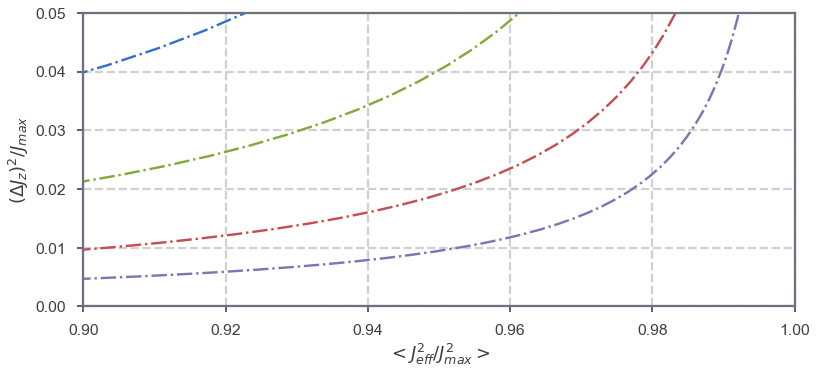

In [125]:
plt.figure(figsize=(8.5*1.5,3.6*1.5))
plt.xlim((0.9,1))
plt.ylim((0.0,0.05))
plt.xlabel('$<J^2_{eff}/J_{max}^2>$')
plt.ylabel('$(\Delta J_{z})^2/J_{max}$')
plt.xticks(np.linspace(0.9,1,5),(0.9,'',0.95,'',1.00),fontsize='15')
plt.yticks(np.linspace(0,0.05,5),(0.0000,'',0.0250,'',0.05),fontsize='15')

DeltaJzdic={}
Jedic={}
for k in [100,200,450,900,1800]:
    DeltaJzdic[str(k)],Jedic[str(k)]=caculaJeff(k)
    plt.plot(Jedic[str(k)],DeltaJzdic[str(k)],'-.',label='Depth=%d'%k)
    
plt.legend(loc='lower right')

/Users/boxiao/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


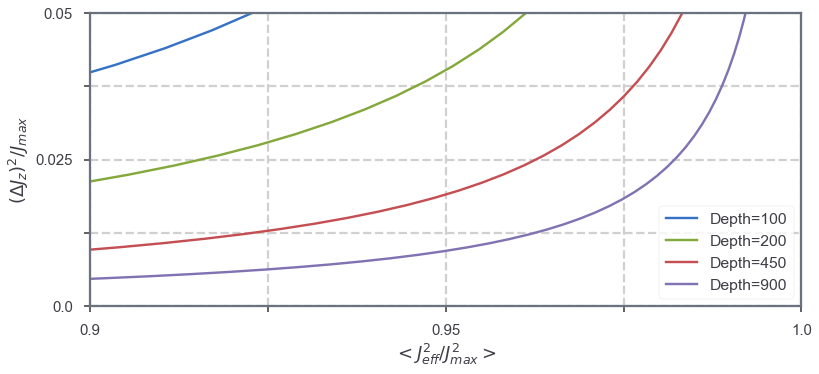

In [128]:
plt.figure(figsize=(8.5*1.5,3.6*1.5))
plt.xlim((0.9,1))
plt.ylim((0.0,0.05))
plt.xlabel('$<J^2_{eff}/J_{max}^2>$')
plt.ylabel('$(\Delta J_{z})^2/J_{max}$')
plt.xticks(np.linspace(0.9,1,5),(0.9,'',0.95,'',1.00),fontsize='15')
plt.yticks(np.linspace(0,0.05,5),(0.0000,'',0.0250,'',0.05),fontsize='15')

for k in [100,200,450,900,1800]:
    #DeltaJzdic[str(k)],Jedic[str(k)]=caculaJeff(k)
    plt.plot(Jedic[str(k)],DeltaJzdic[str(k)],'-',label='Depth=%d'%k)
plt.legend(loc='lower right')

Current K:10
Time used  0.388194000000027
Current K:20


/Users/boxiao/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Time used  0.6482010000000002
Current K:50
Time used  2.663578000000001
Current K:100
Time used  5.397514000000001


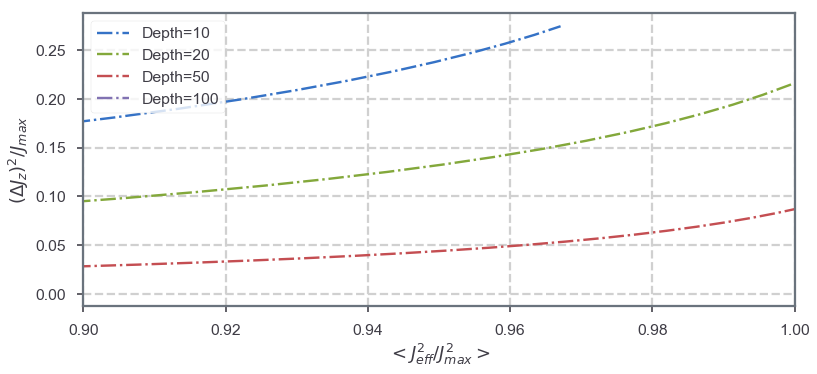

In [34]:
N=100

def caculaJeff(K,N=N):
    start = time.clock()
    print('Current K:%d'%K)
    J=int(K/2)
    Jplus=np.eye(2*J+1,k=1)
    Jmius=np.eye(2*J+1,k=-1)
    for i in range(2*J):
        Jplus[i][i+1]=np.sqrt((J+(J-i)+1)*(J-(J-i)))

    for i in range(2*J):
        Jmius[i+1][i]=np.sqrt((J-(J-i-1)+1)*(J+(J-i-1)))

    Jx=(Jplus+Jmius)/2
    Jy=(Jplus-Jmius)/2j
    Jz=np.eye(2*J+1)*np.linspace(J,-J,2*J+1)

    Jx=qutip.Qobj(Jx)
    Jy=qutip.Qobj(Jy)
    Jz=qutip.Qobj(Jz)


    def grstate(labm):
        hf=Jz**2-labm*Jx
        return hf.eigenstates()[1][0]

    def deltaJz(state,N,k):
        #print(hf(labma))
        #print(state)
        return N/k*(qutip.expect(Jz**2,state)-qutip.expect(Jz,state)**2)/np.sqrt(N/2*(N/2-1))  

    def Jeff(state,N,k):
        #print(state)
        h1=qutip.expect(Jx**2+Jy**2,state)
        #print(h1)
        h2=qutip.expect(Jx,state)**2+qutip.expect(Jy,state)**2
        #print(h2)
        h3=qutip.expect(Jz**2,state)
        #print(h3)
        return N/k*h1/(N/2*(N/2-1))+N/k*(N/k-1)*h2/(N/2*(N/2-1))+N/k*h3/(N/2*(N/2-1))
        
    DeltaJz=[]
    Je=[]
    for la in np.logspace(-1.8,0.8,50):
        state=grstate(la)
        DeltaJz.append(deltaJz(state,N,K))
        Je.append(Jeff(state,N,K))
    elapsed = (time.clock() - start)
    print('Time used ',elapsed)
    return DeltaJz,Je

plt.figure(figsize=(8.5*1.5,3.6*1.5))
plt.xlim((0.9,1))
#plt.ylim((0.0,0.2))
plt.xlabel('$<J^2_{eff}/J_{max}^2>$')
plt.ylabel('$(\Delta J_{z})^2/J_{max}$')
#plt.xticks(np.linspace(0.9,1,5),(0.9,'',0.95,'',1.00),fontsize='15')
#plt.yticks(np.linspace(0,0.05,5),(0.0000,'',0.0250,'',0.05),fontsize='15')

DeltaJzdic={}
Jedic={}
for k in [10,20,50]:
    DeltaJzdic[str(k)],Jedic[str(k)]=caculaJeff(k,N=100)
    plt.plot(Jedic[str(k)],DeltaJzdic[str(k)],'-.',label='Depth=%d'%k)
    
plt.legend(loc='best')